C:\Users\souri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


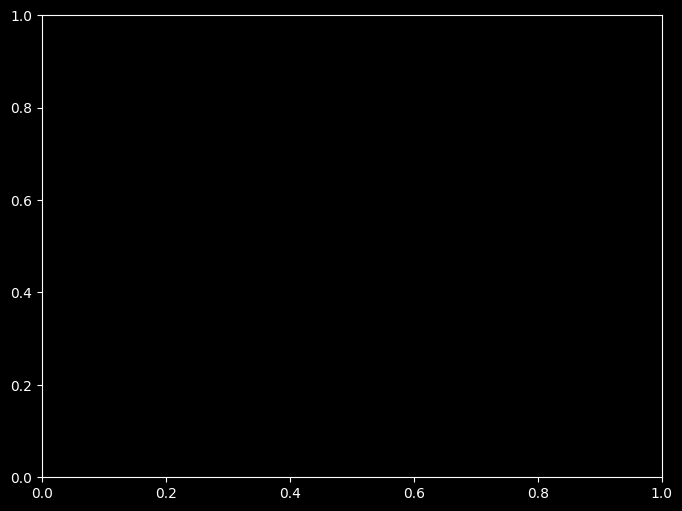

In [ ]:
import networkx as nx
import random
from matplotlib.animation import FuncAnimation

import matplotlib.pyplot as plt

# Parameters
num_nodes = 20
initial_edges = 55
steps = 50

# Create initial graph
G = nx.gnm_random_graph(num_nodes, initial_edges)
for u, v in G.edges():
    G[u][v]['weight'] = random.randint(1, 10)

# Fix node positions
pos = nx.spring_layout(G, seed=42)

def update_graph(G):
    action = random.choices(
        ['weight_update', 'edge_change', 'node_change'],
        weights=[0.4, 0.3, 0.25],
        k=1
    )[0]

    if action == 'weight_update' and G.number_of_edges() > 0:
        # Update weight of a random edge
        u, v = random.choice(list(G.edges()))
        G[u][v]['weight'] = random.randint(1, 10)
    elif action == 'edge_change':
        if random.random() < 0.5 and G.number_of_edges() > 0:
            # Remove a random edge
            G.remove_edge(*random.choice(list(G.edges())))
        else:
            # Add a random edge
            possible = list(nx.non_edges(G))
            if possible:
                u, v = random.choice(possible)
                G.add_edge(u, v, weight=random.randint(1, 10))
    elif action == 'node_change':
        if random.random() < 0.5 and G.number_of_nodes() > 1:
            # Remove a random node
            G.remove_node(random.choice(list(G.nodes())))
        else:
            # Add a new node
            new_node = max(G.nodes(), default=-1) + 1
            G.add_node(new_node)
            # Optionally connect it to existing nodes
            targets = random.sample(list(G.nodes()), k=min(2, G.number_of_nodes()-1))
            for t in targets:
                if t != new_node:
                    G.add_edge(new_node, t, weight=random.randint(1, 10))
            # Add position for new node
            pos[new_node] = [random.uniform(-1, 1), random.uniform(-1, 1)]

fig, ax = plt.subplots(figsize=(8, 6))

def animate(i):
    ax.clear()
    update_graph(G)
    # Remove positions for deleted nodes
    for node in list(pos.keys()):
        if node not in G.nodes():
            del pos[node]
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='skyblue', edge_color='gray')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)
    ax.set_title(f"Step {i+1}")

ani = FuncAnimation(fig, animate, frames=steps, interval=800, repeat=False)
plt.show()

C:\Users\souri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
C:\Users\souri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


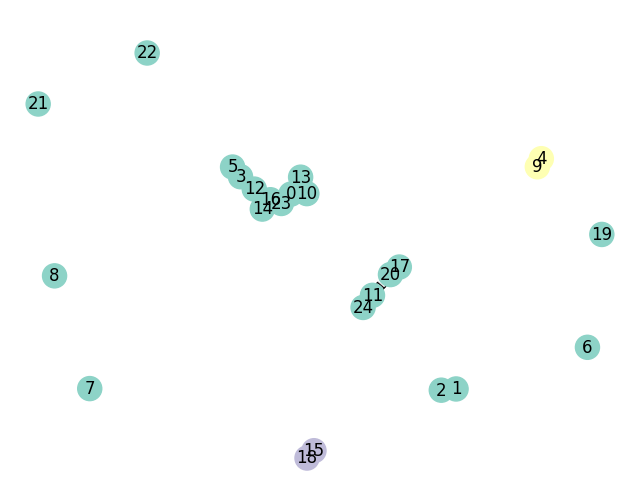

In [ ]:
from sklearn.cluster import SpectralClustering
import numpy as np

def markov_clustering(G):
    # Build adjacency matrix
    A = nx.to_numpy_array(G)
    # Row-normalize to get Markov transition matrix
    row_sums = A.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1  # avoid division by zero
    P = A / row_sums

    # Use spectral clustering as a proxy for Markov-based clustering
    n_clusters = min(3, G.number_of_nodes())  # choose up to 3 clusters
    clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
    labels = clustering.fit_predict(P)
    return labels

labels = markov_clustering(G)

fig2, ax2 = plt.subplots(figsize=(8, 6))
colors = [f"C{l}" for l in labels]
nx.draw(G, pos, ax=ax2, with_labels=True, node_color=colors, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax2)
ax2.set_title("Graph Clustering via Markov Dynamics (Spectral Clustering)")

plt.show()